In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import pandas as pd

# 读入iris数据
iris = load_iris()
X = iris.data  # data
y = iris.target  # label

Text(0.5,1,'First and third features')

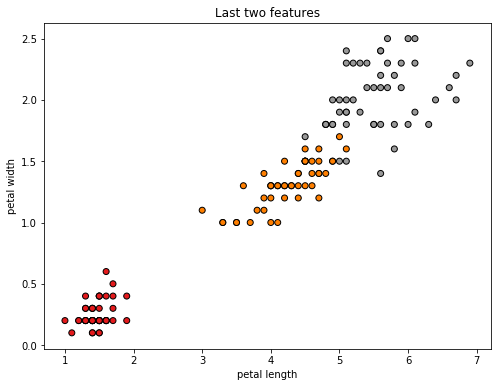

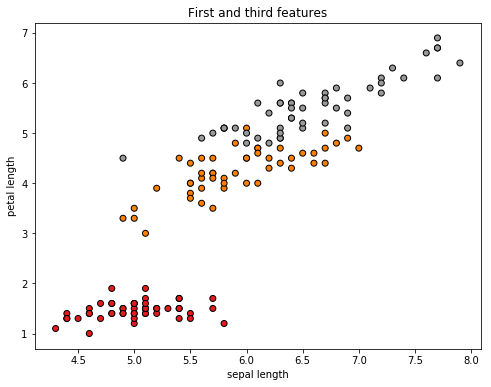

In [115]:
# Plot the points using the last two features
plt.figure(1, figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Last two features')

plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('First and third features')

	中件根据试验发现，2、3列属性与0、2列属性的类别分布情况比较集中，其他组合都比较紊乱，而使用2、3列属性时不同类别间交错最少，故之后实验内容均使用2、3列属性进行学习、预测。

0.5528190123564091


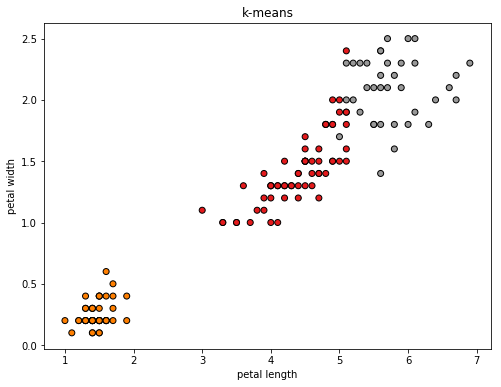

In [116]:
# k-means
np.random.seed(5)  
km = KMeans(n_clusters=3).fit(X) 
km_labels = km.labels_
plt.figure(3, figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3],
           c=km_labels.astype(np.float), cmap=plt.cm.Set1, edgecolor='k')
plt.title("k-means")
plt.xlabel("petal length")
plt.ylabel("petal width")

score = metrics.silhouette_score(X, km_labels, metric='euclidean')  # 计算silhouette系数，评估其聚类性能
print(score)

	通过测试发现，不断变更random的种子值，分类的结果变化微小，是一个比较稳定、有效的无监督学习器。

In [117]:
#尝试出最佳的参数搭配
res = []
for eps in np.arange(0.01,1,0.05):
    for min_samples in range(2,10):
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        dbscan.fit(X)
        # -1表示异常点
        n_clusters = len([i for i in set(dbscan.labels_) if i != -1])
        outliners = np.sum(np.where(dbscan.labels_ == -1, 1,0))
        stats = str(pd.Series([i for i in dbscan.labels_ if i != -1]).value_counts().values)
        res.append({'eps':eps,'min_samples':min_samples,'n_clusters':n_clusters,
        'outliners':outliners,'stats':stats})

df = pd.DataFrame(res)

      eps  min_samples  n_clusters  outliners      stats
26   0.16            4           2        137      [7 6]
35   0.21            5           2        133    [10  7]
36   0.21            6           2        134      [9 7]
37   0.21            7           2        134      [9 7]
43   0.26            5           2        112    [33  5]
53   0.31            7           2        105    [38  7]
62   0.36            8           2         96    [43 11]
63   0.36            9           2        102    [39  9]
75   0.46            5           2         21    [80 49]
76   0.46            6           2         26    [77 47]
77   0.46            7           2         27    [76 47]
78   0.46            8           2         30    [73 47]
79   0.46            9           2         33    [70 47]
83   0.51            5           2         16    [85 49]
84   0.51            6           2         18    [83 49]
85   0.51            7           2         21    [81 48]
86   0.51            8         

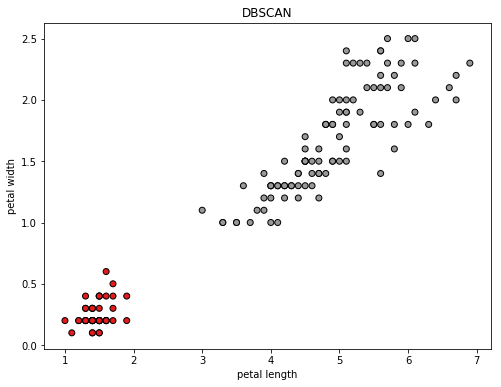

In [75]:
#如果选择簇为2，结果如何
print(df.loc[df.n_clusters == 2, :])
db = DBSCAN(eps=0.96, min_samples=9).fit(X)
db_labels = db.labels_
plt.figure(4, figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3],
           c=db_labels.astype(np.float), cmap=plt.cm.Set1, edgecolor='k')
plt.title("DBSCAN")
plt.xlabel("petal length")
plt.ylabel("petal width")

score = metrics.silhouette_score(X, db_labels, metric='euclidean') 
print(score)

      eps  min_samples  n_clusters  outliners       stats
34   0.21            4           3        128  [10  8  4]
52   0.31            6           3         99  [39  6  6]
60   0.36            6           3         80  [43 17 10]
61   0.36            7           3         81  [43 16 10]
71   0.41            9           3         78  [44 18 10]
74   0.46            4           3         15  [82 49  4]
82   0.51            4           3         12  [85 49  4]
89   0.56            3           3          5  [92 49  4]
90   0.56            4           3          5  [92 49  4]
97   0.61            3           3          5  [92 49  4]
98   0.61            4           3          5  [92 49  4]
104  0.66            2           3          1  [97 50  2]
112  0.71            2           3          1  [97 50  2]
120  0.76            2           3          0  [98 50  2]
128  0.81            2           3          0  [98 50  2]
0.16440204115546342


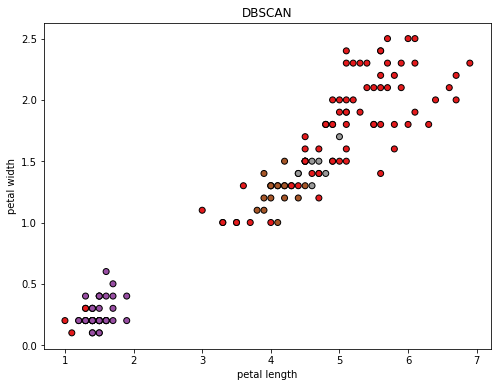

In [76]:
#如果选择簇为3，结果如何
print(df.loc[df.n_clusters == 3, :])
db = DBSCAN(eps=0.41, min_samples=9).fit(X)
db_labels = db.labels_
plt.figure(4, figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3],
           c=db_labels.astype(np.float), cmap=plt.cm.Set1, edgecolor='k')
plt.title("DBSCAN")
plt.xlabel("petal length")
plt.ylabel("petal width")

score = metrics.silhouette_score(X, db_labels, metric='euclidean') 
print(score)

	由于一开始使用DBSCAN发现结果与实际差距非常大，于是使用了网上的小技巧进行参数筛选。竟然发现被分为两类的话结果反而更可观，而分为三类的话，要么就是误差非常大，要么就是分类结果极不均匀。再回顾DBSCAN的分类原理也能够解释这种现象，DBSCAN是根据中心核之间连接进行分类的，这种机制就会导致：如果不同的类属性值比较接近的话就会被连在一起变成一个类，这是无论怎么调整参数都无法解决的问题
    结论：DBSCAN只适用于属性值差距明显的分类

In [83]:
# GMM
gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm_labels = gmm.fit_predict(X)

fig = plt.figure(5, figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3],
           c=gmm_labels.astype(np.float), cmap=plt.cm.Set1, edgecolor='k')
plt.title("GMM")
plt.xlabel("petal length")
plt.ylabel("petal width")

score = metrics.silhouette_score(X, gmm_labels, metric='euclidean') 
print(score)
gmm = GaussianMixture(n_components=3, covariance_type='tied')
gmm_labels = gmm.fit_predict(X)
score = metrics.silhouette_score(X, gmm_labels, metric='euclidean') 
print(score)
gmm = GaussianMixture(n_components=3, covariance_type='diag')
gmm_labels = gmm.fit_predict(X)
score = metrics.silhouette_score(X, gmm_labels, metric='euclidean') 
print(score)

0.5011761635067201
0.5200478732163507
0.552280674674818


	由于高斯分类器是由著名的高斯分布以原理设计的，里面的数学计算逻辑严密而准确，所以调用不同参数分类结果稳定

In [113]:
import scipy.cluster.hierarchy as sch  
import seaborn as sns
import matplotlib.pylab as plt    
re = ['average','single','complete']                    
for i in re:
    Z = sch.linkage(X, method=i, metric='euclidean') 
    label = sch.fcluster(Z,2,'distance')#显示标签
    sch.dendrogram(Z)   #绘制聚类树状图       
    plt.show()                                 

Z = sch.linkage(X, method='complete', metric='euclidean') 
label = sch.fcluster(Z,2,'distance')#显示标签
score = metrics.silhouette_score(X, f, metric='euclidean') 
print(score)

	可以看出，采用分层聚类的方法，不同的参数标准会导致截然不同的类别分布。而且和DBSCAN存在同样的问题：样本的属性值一旦比较相似就很难被区分开，因为他们的机理都是根据相邻的距离进行聚簇的。